In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import seaborn as sns
import klib

In [2]:
data= pd.read_csv(r'C:\Users\amina\Desktop\Python_course\creditcard (1).csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data= data.drop_duplicates()

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [8]:
klib.corr_mat(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,0.03,-0.25,0.13,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


In [9]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
X= data.drop(columns=['Class'])
Y= data['Class']
#SMOTE Method ( Over-Sampling == Suréchantillonnage )
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, Y)

df_resampled = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
data= df_resampled

c:\Users\amina\Desktop\Python_course\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\amina\Desktop\Python_course\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [13]:
data['Class'].value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [14]:
target = 'Class'
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X = data[features]
Y = data[target]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 42, max_depth=7, max_features='sqrt')  # n_estimators==nb d'arbres
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=30, random_state=42)

In [36]:
importances = classifier.feature_importances_
importances

array([0.00197701, 0.00735319, 0.01817009, 0.12494695, 0.08821654,
       0.00130764, 0.0019265 , 0.00351175, 0.00367464, 0.0180588 ,
       0.11372182, 0.01607252, 0.06744857, 0.00123074, 0.3371675 ,
       0.00131785, 0.04227006, 0.10882323, 0.00596533, 0.00234406,
       0.00169458, 0.01229561, 0.00144779, 0.00132695, 0.00068819,
       0.00100335, 0.00106313, 0.01129445, 0.00226125, 0.00141987])

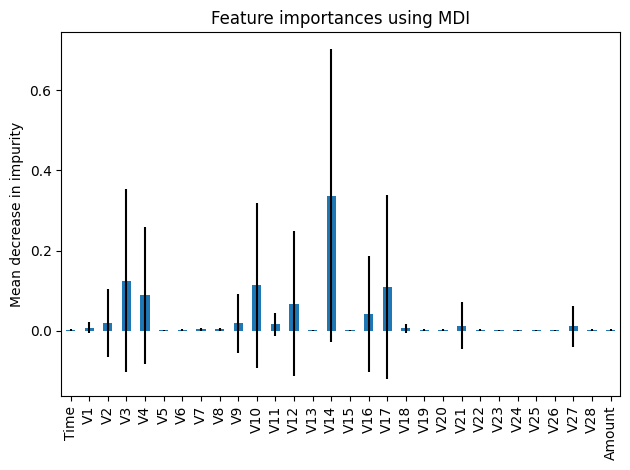

In [37]:
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70523   257]
 [ 3004 67843]]


0.9769747293948188

In [70]:
#identify the indices of the top 10 features
top_feature_indices = np.argsort(importances)[-10:]

In [71]:
#extract the top 10 features from the dataset
X_top_features_train = X_train[:, top_feature_indices]
X_top_features_test = X_test[:, top_feature_indices]

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier_top_features= RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 73, max_depth=6, max_features='sqrt')  # n_estimators==nb d'arbres
classifier_top_features.fit(X_top_features_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=73)

In [73]:
#evaluate the model on the test set
y_pred_top_features = classifier_top_features.predict(X_top_features_test)

In [74]:
#print the confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_top_features))
print("Accuracy:", accuracy_score(y_test, y_pred_top_features))

[[70334   446]
 [ 3376 67471]]
Accuracy: 0.9730136202842679


In [75]:
import joblib
joblib.dump(classifier_top_features, 'classifier_top_features.joblib')

['classifier_top_features.joblib']

In [76]:
#save the indices of the top 10 features
np.save('top_feature_indices.npy', top_feature_indices)
print(top_feature_indices)

[11  9  2 16 12  4 17 10  3 14]


## CATBOOST Classifier Model

In [40]:
from catboost import CatBoostClassifier

In [56]:
model = CatBoostClassifier(iterations=15,depth=5, learning_rate=0.1)

model.fit(X_train, y_train)


0:	learn: 0.5004895	total: 42.1ms	remaining: 589ms
1:	learn: 0.3639571	total: 80.1ms	remaining: 521ms
2:	learn: 0.2749160	total: 116ms	remaining: 464ms
3:	learn: 0.2263007	total: 152ms	remaining: 417ms
4:	learn: 0.1849372	total: 188ms	remaining: 376ms
5:	learn: 0.1607961	total: 224ms	remaining: 336ms
6:	learn: 0.1412585	total: 271ms	remaining: 309ms
7:	learn: 0.1278252	total: 307ms	remaining: 269ms
8:	learn: 0.1177929	total: 346ms	remaining: 231ms
9:	learn: 0.1104297	total: 381ms	remaining: 190ms
10:	learn: 0.1030182	total: 422ms	remaining: 154ms
11:	learn: 0.0979983	total: 462ms	remaining: 116ms
12:	learn: 0.0934722	total: 504ms	remaining: 77.5ms
13:	learn: 0.0896802	total: 540ms	remaining: 38.6ms
14:	learn: 0.0861984	total: 577ms	remaining: 0us


In [57]:
predictions = model.predict(X_test)

In [58]:
cm2 = confusion_matrix(y_test, predictions)
print(cm2)
accuracy_score(y_test, predictions)

[[69959   821]
 [ 3102 67745]]


0.9723004794283576

## LIGHTGBM MODEL

In [59]:
import lightgbm as lgb

In [64]:
trainig_set=lgb.Dataset(X_train,label=y_train)
testing_set=lgb.Dataset(X_test,label=y_test)

In [65]:
params = {'objective': 'multiclass','num_class': 3,'boosting_type': 'gbdt'}
num_round = 10
classifier1 = lgb.train(params, trainig_set, num_round, valid_sets=[testing_set])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 424879, number of used features: 30
[LightGBM] [Info] Start training from score -0.692990
[LightGBM] [Info] Start training from score -0.693305
[LightGBM] [Info] Start training from score -34.538776


In [66]:
y_pred2 = classifier1.predict(X_test, num_iteration=classifier1.best_iteration)
y_pred_class = [np.argmax(pred) for pred in y_pred2]

In [67]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9841202595550284


In [69]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(boosting_type='gbdt', num_leaves=8, max_depth=-1, learning_rate=0.1, n_estimators=10, 
                     subsample_for_bin=200000, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=5,
                     subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,
                     importance_type='split', force_col_wise=True)
lgb.fit(X_train, y_train) 
y_pred3= lgb.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print("Accuracy:", accuracy_score(y_test, y_pred3))

[LightGBM] [Info] Number of positive: 212406, number of negative: 212473
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 424879, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499921 -> initscore=-0.000315
[LightGBM] [Info] Start training from score -0.000315
[[69663  1117]
 [ 3392 67455]]
Accuracy: 0.9681628503039674


##xgboost MODEL

In [ ]:
import xgboost as xgb
classifier3 =  xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
classifier3.fit(X_train, y_train)

In [ ]:
y_pred = classifier3.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)